<a href="https://colab.research.google.com/github/MikeinWang/11-6/blob/main/%E6%95%B0%E5%80%BC%E5%88%86%E6%9E%90%E7%AC%AC%E5%8D%81%E5%9B%9B%E8%AF%BE%E4%BD%9C%E4%B8%9A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 尝试编写程序，用差分法求解微分方程边值问题例题
**2020213450_王镜淇**

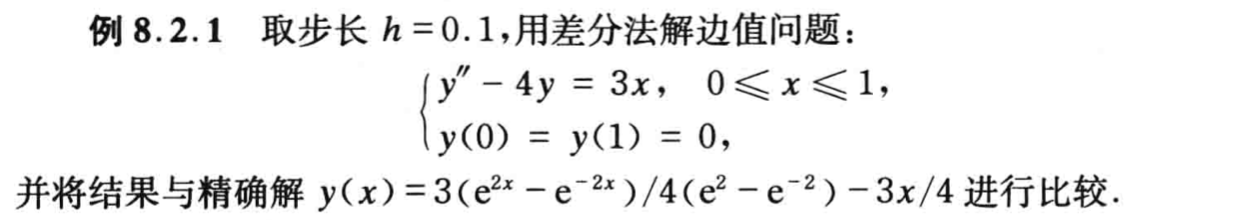

In [ ]:
import numpy as np

In [ ]:
def f1(x):
  return 3*x

In [ ]:
def q(x):
  return 4

In [ ]:
#精确解，用于与近似解做比较
def raw1(x):
  return 3*(np.exp(2*x)-np.exp(-2*x))/(4*(np.exp(2)-np.exp(-2)))-3*x/4

In [ ]:
def interpolation_1(h):
  N = int(1/h)
  #i=1时的特殊情况
  tmp = np.zeros((N-1,N-1),dtype=float)
  tmp[0][0] = -(2+(h**2)*q(h))
  tmp[0][1] = 1
  #i=N-2时的特殊情况
  tmp[N-2][N-3] = 1
  tmp[N-2][N-2] = -(2+(h**2)*q((N-2)/10))
  
  #一般情况
  for i in range(1,N-2):
    x = i/10
    tmp[i][i-1] = 1
    tmp[i][i] = -(2+(h**2)*q(x))
    tmp[i][i+1] = 1

  W = np.zeros((N-1,1),dtype=float)
  #特殊情况
  W[0] = (h**2)*f1(0.1)
  W[N-2] = f1((N-1)/10)*(h**2)
  #一般情况
  for i in range(1,N-2):
    x = (i+1)/10
    W[i] = h**2*f1(x)
  
  Result = np.linalg.inv((tmp)).dot(W)
  #添加区间结点
  Result = np.insert(Result,0,[0],axis=0)
  Result = np.insert(Result,N,[0],axis=0)

  print("{}\t{}\t{}\t\t{}".format("i","x","y","原始值"))
  for i in range(0,N+1):
    x = i/10
    print("{}\t{}\t{}\t{}".format(i,x,'%.7f' %float(Result[i]), '%.7f' %raw1(x)))

  return Result

In [ ]:
Result = interpolation_1(0.1)

i	x	y		原始值
0	0.0	0.0000000	0.0000000
1	0.1	-0.0332923	-0.0333656
2	0.2	-0.0649163	-0.0650604
3	0.3	-0.0931369	-0.0933461
4	0.4	-0.1160831	-0.1163482
5	0.5	-0.1316725	-0.1319796
6	0.6	-0.1375288	-0.1378578
7	0.7	-0.1308863	-0.1312087
8	0.8	-0.1084793	-0.1087553
9	0.9	-0.0664114	-0.0665865
10	1.0	0.0000000	0.0000000


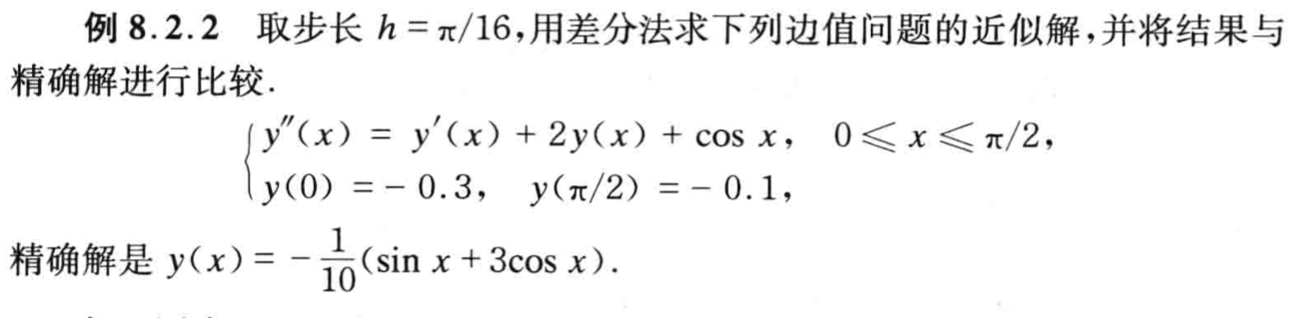

In [ ]:
import math

In [ ]:
def f2(x):
  return np.cos(x)

In [ ]:
def p(x):
  return -1

In [ ]:
def q(x):
  return -2

In [ ]:
#精确解，用于与近似解做比较
def raw2(x):
  return -(np.sin(x)+3*np.cos(x))/10

In [ ]:
def interpolation_2(a,b,h):
   N = int((b-a)/h)
   a = -0.3
   b = -0.1

   tmp = np.zeros((N-1,N-1),dtype=float)
   #两种特殊情况
   tmp[0][0] = -2*(2-(h**2)*q(h))
   tmp[0][1] = 2+h*p(h)

   tmp[N-2][N-3] = 2-h*p((N-2)*(math.pi)/16)
   tmp[N-2][N-2] = -2*(2-(h**2)*q((N-2)*(math.pi)/16))

   #一般情况
   for i in range(1,N-2):
     x = (i+1)*(math.pi)/16
     tmp[i][i-1] = 2-h*p(x)
     tmp[i][i] = -2*(2-(h**2)*q(x))
     tmp[i][i+1] = 2+h*p(x)
   
   W = np.zeros((N-1,1),dtype=float)
   #特殊情况
   W[0] = 2*(h**2)*f2((math.pi)/16)- (2-h*p(0))*a
   W[N-2] = 2*(h**2)*f2((N-1)*(math.pi)/16)-(2+h*p((N-1)*(math.pi)/16))*b
   
   #一般情况
   for i in range(1,N-2):
     x = (i+1)*(math.pi)/16
     W[i] = 2*(h**2)*f2(x)

   #求结矩阵
   Result = np.linalg.inv((tmp)).dot(W)
   #添加区间结点
   Result = np.insert(Result,0,[-0.3],axis=0)
   Result = np.insert(Result,N,[-0.1],axis=0)

   print("{}\t{}\t\t{}\t\t{}".format("i","x","y","准确值"))
   for i in range(0,N+1):
      x = i*(math.pi)/16
      print("{}\t{}\t{}\t{}".format(i,'%.7f' %float(x),'%.7f' %float(Result[i]), '%.7f' %raw2(x)))

   return Result

In [ ]:
Result2 = interpolation_2(0,(math.pi)/2,(math.pi)/16)

i	x		y		准确值
0	0.0000000	-0.3000000	-0.3000000
1	0.1963495	-0.3137967	-0.3137446
2	0.3926991	-0.3154982	-0.3154322
3	0.5890486	-0.3050494	-0.3049979
4	0.7853982	-0.2828621	-0.2828427
5	0.9817477	-0.2497999	-0.2498180
6	1.1780972	-0.2071465	-0.2071930
7	1.3744468	-0.1565577	-0.1566056
8	1.5707963	-0.1000000	-0.1000000
